<a href="https://colab.research.google.com/github/igntrevor/AI-ML-School-Work/blob/main/Group_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

In [9]:
# loading the necessary libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot  as pylot
import seaborn as s
from google.colab import drive


In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#importing the necessary dataset
avocado = pd.read_csv('/content/drive/My Drive/avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [12]:
# anormalities detections
# finding the number of missing values in each column
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
# cheking for anormalities in form of duplicatesimport pandas as pd

def find_abnormal_columns(data, threshold=0.2):
    """
    Find abnormal columns based on the percentage of missing values.

    Parameters:
    - data: pandas DataFrame
    - threshold: float, the threshold for the percentage of missing values to consider a column abnormal

    Returns:
    - abnormal_columns: list, names of abnormal columns
    """
    abnormal_columns = []
    total_rows = len(data)

    for column in data.columns:
        missing_percentage = data[column].isnull().sum() / total_rows
        if missing_percentage > threshold:
            abnormal_columns.append(column)

    return abnormal_columns

# Assuming 'your_dataset.csv' is your dataset file
dataset_path = 'avocado.csv'
avocado = pd.read_csv('/content/drive/My Drive/avocado.csv')

# You can adjust the threshold based on your specific case
abnormal_columns = find_abnormal_columns(avocado, threshold=0.2)

if not abnormal_columns:
    print("No abnormal columns found.")
else:
    print("Abnormal columns:", abnormal_columns)


No abnormal columns found.


In [15]:
# Checking for and handle duplicate entries
duplicates_count = avocado.duplicated().sum()

# Printing the number of duplicate entries
print("\nNumber of duplicate entries:", duplicates_count)


Number of duplicate entries: 0


#### the dataset has no columns with abnormalities

In [16]:
# dropping the mentioned columns
columns_to_drop = ['4046', '4225', '4770']
df = avocado.drop(columns_to_drop, axis=1)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
# Find the year with the least number of bags
min_bags_year = df.loc[df['Total Bags'].idxmin()]['year']

# Display the result
print(f"The year with the least number of bags is: {min_bags_year}")

The year with the least number of bags is: 2015


In [18]:
# Find the state with the least number of bags
min_bags_state = df.loc[df['Total Bags'].idxmin()]['region']

# Display the result
print(f"The state with the least number of bags is: {min_bags_state}")

The state with the least number of bags is: Atlanta


In [19]:
# Find the state with the highes number of bags
max_bags_state = df.loc[df['Total Bags'].idxmax()]['region']

# Display the result
print(f"The state with the highest number of bags is: {max_bags_state}")


The state with the highest number of bags is: TotalUS


In [20]:
# Find the state with the highest price of avocado
max_price_state = df.loc[df['AveragePrice'].idxmin()]['region']

# Display the result
print(f"The state with the highest price of avocado is: {max_price_state}")

The state with the highest price of avocado is: CincinnatiDayton


In [21]:
# Find the state that consumes the most avocado
max_volume_state = df.loc[df['Total Volume'].idxmin()]['region']

# Display the result
print(f"The state state that consumes the most avocado is: {max_volume_state}")

The state state that consumes the most avocado is: MiamiFtLauderdale


In [22]:
# finding the default datatypes in a dataset
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We 3 different data types. Object, Float and integer

In [23]:
import pandas as pd
from prophet import Prophet


# Filter the data to only include the 'AveragePrice' column
df = df[['Date', 'AveragePrice']]

# Rename the columns
df.columns = ['ds', 'y']

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_xq7ef6r/5eg6nqfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_xq7ef6r/o8d3z023.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89400', 'data', 'file=/tmp/tmp_xq7ef6r/5eg6nqfn.json', 'init=/tmp/tmp_xq7ef6r/o8d3z023.json', 'output', 'file=/tmp/tmp_xq7ef6r/prophet_modelyatmvvj3/prophet_model-20240120060005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:00:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:00:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
169 2018-03-26  1.351962    0.870947    1.847546
170 2018-03-27  1.354128    0.848980    1.853427
171 2018-03-28  1.356391    0.863276    1.830133
172 2018-03-29  1.358700    0.882200    1.816537
173 2018-03-30  1.361005    0.871128    1.836760
174 2018-03-31  1.363253    0.879387    1.847476
175 2018-04-01  1.365393    0.889400    1.839190
176 2018-04-02  1.367376    0.905897    1.849603
177 2018-04-03  1.369155    0.899291    1.865858
178 2018-04-04  1.370689    0.896978    1.856538
179 2018-04-05  1.371940    0.904009    1.848661
180 2018-04-06  1.372878    0.879620    1.860401
181 2018-04-07  1.373478    0.895170    1.856128
182 2018-04-08  1.373722    0.864170    1.830731
183 2018-04-09  1.373601    0.903912    1.842341
184 2018-04-10  1.373113    0.906346    1.848095
185 2018-04-11  1.372261    0.847629    1.866791
186 2018-04-12  1.371058    0.889510    1.828794
187 2018-04-13  1.369522    0.869333    1.858357
188 2018-04-14  1.36

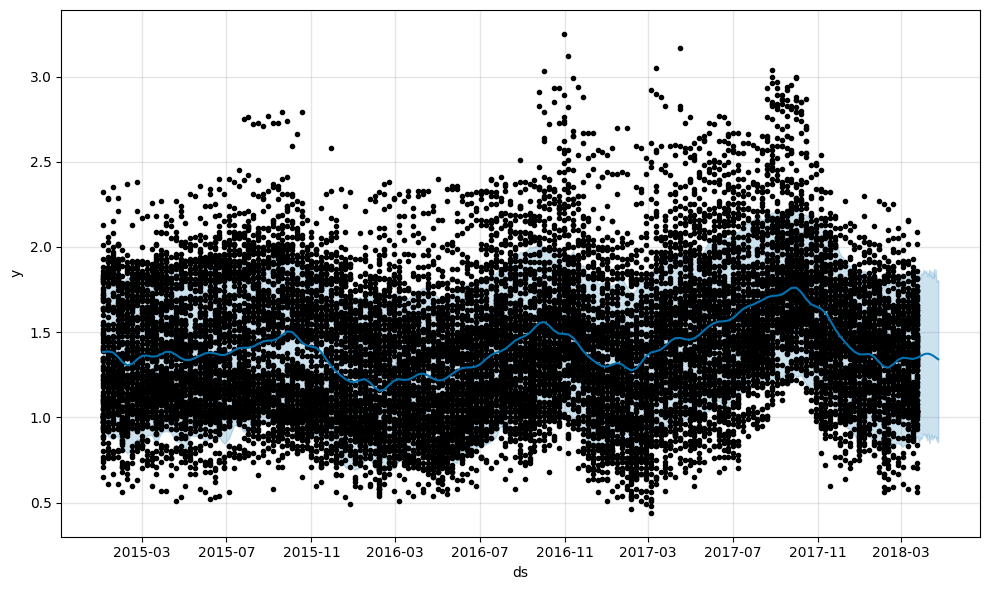

In [24]:
# Make a 30-day forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
# Print the forecast data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))